In [ ]:
Clustering Module 


In [18]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct  3 22:53:01 2023

@author: hkpen
"""
import numpy as np
import json
#import sys
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#import numpy as np

D={}
mat_id_list= []
sg_number_list=[]
formulae_list=[]
band_gap_list=[]
nelements_list=[]
elements_list=[]
discovery_route_list=[]
formula_anonymous_list=[]
exfoliation_energy_list=[]
decomposition_energy_list=[]
crystal_list=[]
point_group_list=[]

open and read db file

In [19]:
with open('db.json') as f:
    for jsonobj in f:
        strDict=json.loads(jsonobj)
        mat_id_list.append(strDict['material_id'])
        sg_number_list.append(strDict['sg_number'])
        formulae_list.append(strDict['formula_pretty'])
        band_gap_list.append(strDict['bandgap'])
        nelements_list.append(strDict['nelements'])
        elements_list.append(strDict['elements'])
        discovery_route_list.append(strDict['discovery_process'])
        formula_anonymous_list.append(strDict['formula_anonymous'])
        if 'exfoliation_energy_per_atom' in strDict:
            exfoliation_energy_list.append(strDict['exfoliation_energy_per_atom'])
        else:
            exfoliation_energy_list.append(float("nan"))
        if 'decomposition_energy' in strDict:
            decomposition_energy_list.append(strDict['decomposition_energy'])
        else:
            decomposition_energy_list.append(float("nan"))
        crystal_list.append(strDict['spacegroup']['crystal_system'])
        point_group_list.append(strDict['spacegroup']['point_group'])

read data for each mat

No such file FULL_MATPEDIA_DATA/bands/2dm-2001.json
No such file FULL_MATPEDIA_DATA/bands/2dm-2002.json
No such file FULL_MATPEDIA_DATA/bands/2dm-2003.json
-1.76909858


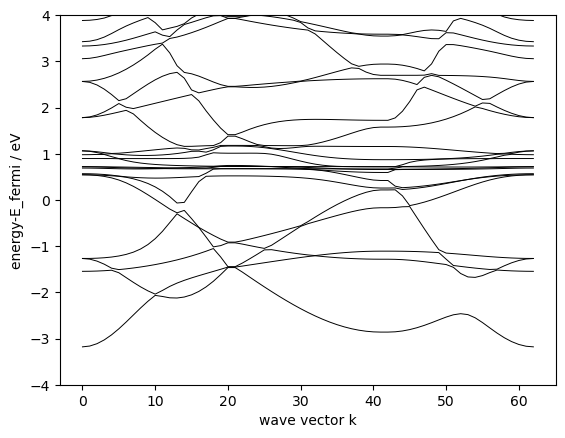

-3.63945248


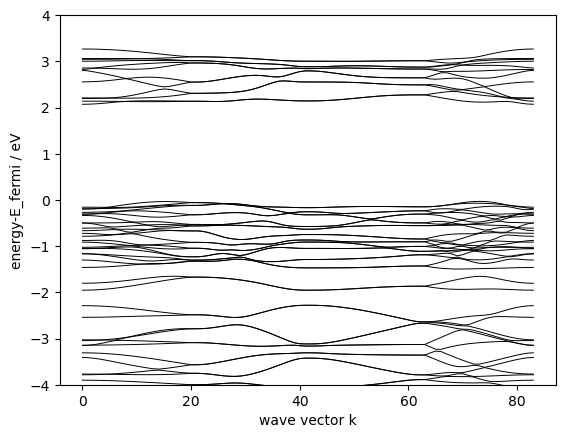

-6.60480955


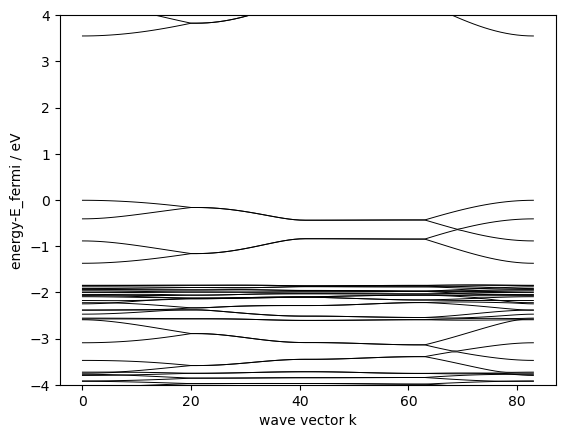

-2.48279885


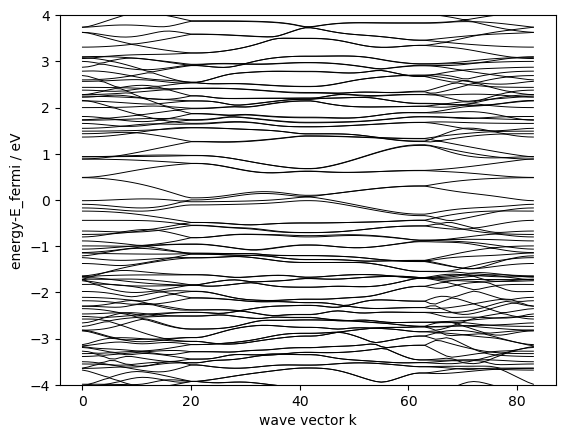

-5.34949776


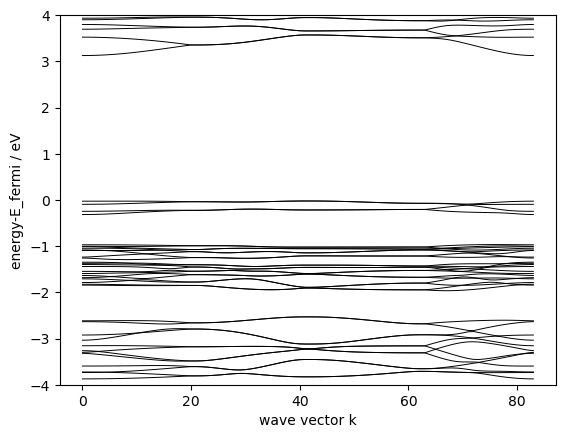

-3.58448204


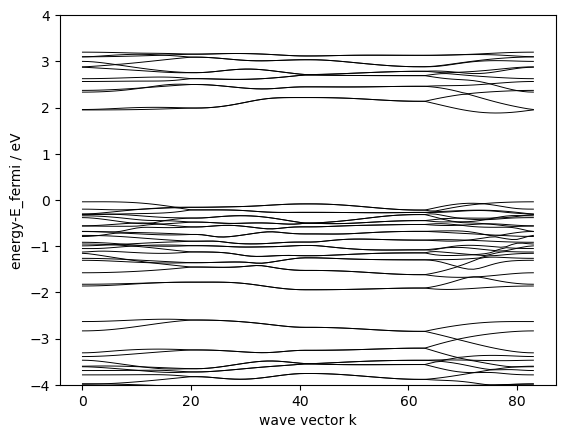

-2.94527392


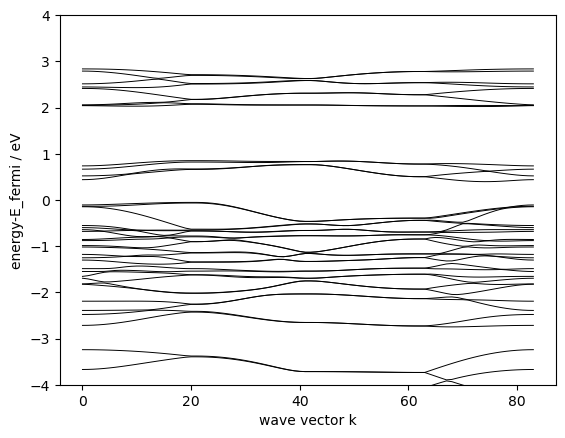

In [24]:
# choose range of material ids to extract:
start_index=2001
end_index=2010

for x in range(start_index,end_index+1):
    name='2dm-'+ str(x)
    BS_dir= 'FULL_MATPEDIA_DATA/bands/'
    filename_bands=BS_dir+name+'.json'
    if not os.path.isfile(filename_bands):
        print("No such file %s" % filename_bands)
        continue
    bands_dict=json.load(open(filename_bands))


    ## create a json with space_group and BS_features(no of division,labels,div locations)
    # aa=bands_dict['branches']   Using the branches feature is not advisable: This feature has a lot of errors
    # branches=len(aa)
    
    bb=bands_dict['labels_dict']
    
    # array of k-points of each of the data points in the band structure
    cc=bands_dict['kpoints']
    
    
    k=list(bb.keys())
    v=list(bb.values())
    div = []
    tag = []
    coord=[]
    for i in range(len(cc)):
            if v.count(cc[i]) > 0:
                ind=v.index(cc[i])
                div.append(i)
                tag.append(k[ind])
                coord.append(v[ind])
    branches=len(div)/2
    ef=bands_dict['efermi']
    
    # arrays of energy values as a function of "cc" k points above - one array in here per band
    dd=bands_dict['bands']
    
#     D[name]={}
#     D[name]['num_divisions']=branches
#     D[name]['tags']=tag
#     D[name]['tag_coordinates']=coord
#     D[name]['divisions']=div
#     D[name]['rec_lattice']=bands_dict['lattice_rec']['matrix']
#     D[name]['space_group']=sg_number_list[mat_id_list.index(name)]
#     D[name]['formulae']=formulae_list[mat_id_list.index(name)]
#     D[name]['band_gap']=band_gap_list[mat_id_list.index(name)]
#     D[name]['nelements']=nelements_list[mat_id_list.index(name)]
#     D[name]['elements']=elements_list[mat_id_list.index(name)]
#     D[name]['discovery_route']=discovery_route_list[mat_id_list.index(name)]
#     D[name]['formula_anonymous']=formula_anonymous_list[mat_id_list.index(name)]
#     D[name]['exfoliation_energy']=exfoliation_energy_list[mat_id_list.index(name)]
#     D[name]['decomposition_energy']=decomposition_energy_list[mat_id_list.index(name)]
#     D[name]['crystal']=crystal_list[mat_id_list.index(name)]
#     D[name]['point_group']=point_group_list[mat_id_list.index(name)]

#     ## Print a file using matplotlib
    x = [*range(0, len(cc), 1)]
#     y=dd['1']
#     if len(dd)==2:
#         z=dd['-1']

#     figure(figsize=(branches*3.873, 15.609), dpi=32)
#     for n in range(len(y)):
#         plt.plot(x,y[n],color='black',linestyle='-',linewidth=10)
#         if len(dd)==2:
#             plt.plot(x,z[n],color='black',linestyle='-',linewidth=10)
#     plt.ylim([-1+ef,1+ef])
    plt.ylim([-4,4])
    print(ef)
#     plt.axis('off')
#     plt.margins(0,0)
#     outfile = name+'.png'
#     print(outfile, branches)
    E_bands = dd['1']
    for i in range(len(E_bands)):
        plt.plot(x, E_bands[i]-ef*np.ones(len(E_bands[i])), color='black', linewidth=0.7)
        
    plt.xlabel('wave vector k')
    plt.ylabel('energy-E_fermi / eV')
    plt.show()
    #plt.savefig(outfile, bbox_inches='tight', pad_inches = 0)
    #plt.close()
    del x, E_bands, bb, cc, dd, branches, ef, k, v, div, tag, bands_dict, filename_bands, name, BS_dir

        
# with open('extracted_data_'+str(start_index)+'_'+str(end_index)+'.json', 'w', encoding='utf-8') as f:
#     json.dump(D, f, ensure_ascii=False, indent=4)